# Profiling Different Types of Abscences

## Introduction

The goal is to create a profiling scheme by classifying the types of workers and their recorded absences at a Brazilian courier company using information about the workers and employment details. This data was pulled from the UCI machine learning [repo](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work). Each row contains a single instance of a recorded absence, and the columns contain details about the worker and his/her employment.



In [2]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
absences = pd.read_csv('./Absenteeism_at_work.csv', sep= ';')

In [4]:
absences.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


Note that a lot of predictors in the table have values that are encoded on the repository (e.g.  the `seasons` column has values `1,2,3,4` that correspond to the season in which the absence took place - `summer (1), autumn (2), winter (3), spring (4)`). The full description of the encoded values can be found on the  [repo](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work).

# Exploratory Data Analysis

First we can easily verify that every column has exactly 740 entries of the absences of the 36 employees, so none of the data has a `NaN` value. However, it appears that a few of the months and reason for absences have been enterd as 0, so we don't know exactly what that month those entries refer to. Do note that the height, weight, and distance from work are recorded in centimeters, kilograms, and kilometers, respectively. 

In [17]:
absences.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


First, let's check the weights, heights, and BMIs of the employees who reported sick.

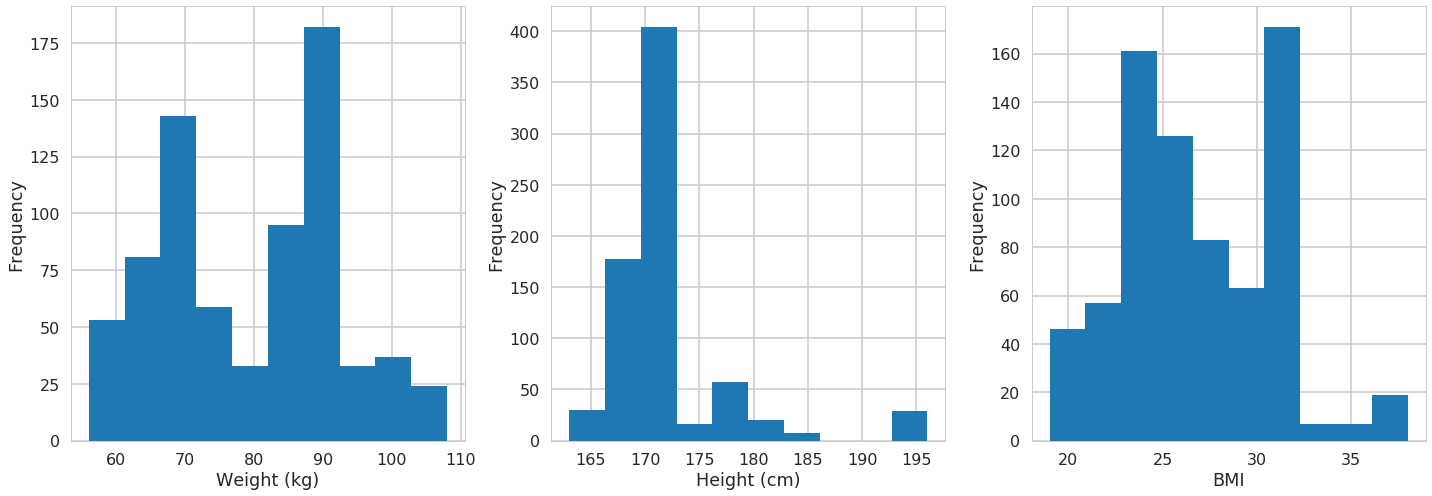

In [40]:
#sns.countplot(absences['Body mass index'])

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)

plt.hist(absences['Weight'])
plt.ylabel('Frequency')
plt.xlabel('Weight (kg)')

plt.subplot(1,3,2)

plt.hist(absences['Height'])
plt.ylabel('Frequency')
plt.xlabel('Height (cm)')

plt.subplot(1,3,3)

plt.hist(absences['Body mass index'])
plt.ylabel('Frequency')
plt.xlabel('BMI')


plt.tight_layout()


plt.show()

Interesting! We expect metrics like weight, height, and BMI to be approximately normal, but both weight and BMI appear to have a bimodal curve, and height looks a bit skewed right.

Now we let's examine what days people tended to call in sick the most:

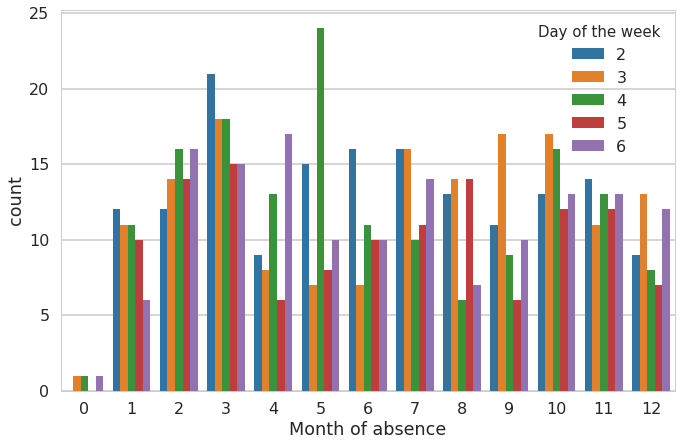

In [63]:
plt.figure(figsize=(11,7)) 
sns.countplot(x='Month of absence', hue='Day of the week', data=absences)
plt.show()


Immediately, we see that for the first 8 months of the year, the most common days of absence were typically Monday (day 2) or Friday (day 6). The last four months of the year features Tuesday (day 3) as a common day of absence, although Monday/Friday absences are still pretty frequent. The month of May features Wednesday as an extremely popular day of absence. 

What about the popularity of the reasons for absences?

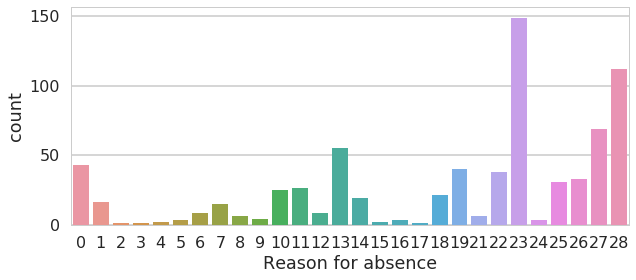

In [54]:
plt.figure(figsize=(10,4)) 
ax1 = sns.countplot(absences['Reason for absence'])
ax1.set_xticklabels(ax1.get_xticklabels(), ha="center")
plt.show()

We see that medical consultation(23) and dental consultation(28) are by far the most popular reasons given, followed by physiotherapy(27), diseases of the musculoskeletal system and connective tissue (13), laboratory examinations (24) and unjustied absence(25). Now let's take a look at how long the absences were for each of these illnesses:

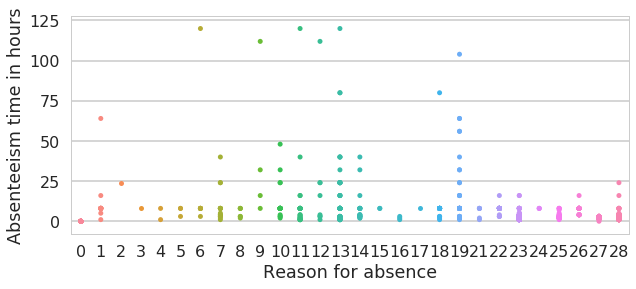

In [64]:
#which types of absencces are the longest?
plt.figure(figsize=(10,4)) 
ax2 = sns.stripplot(x="Reason for absence", y="Absenteeism time in hours", data=absences)
plt.show()

Refering back to the data info in the repo: the last seven reasons for absence (22 through 28) were not attested by the International Code of Diseases (ICD), while reasons 1 through 21 were. Note these last seven reasons had all absences take less than 24 hours, while the first 21 types of absences have lengthier occurences.

# Profiling